# ----x----Spam SMS Detection----x----

Dataset link :- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
! kaggle dfsets download -d uciml/sms-spam-collection-dfset

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
180,ham,You lifted my hopes with the offer of money. I...,NaN,NaN,NaN
3650,ham,Want to send me a virtual hug?... I need one,NaN,NaN,NaN
1909,ham,Then u going ikea str aft dat?,NaN,NaN,NaN
4015,ham,In which place i can get rooms cheap:-),NaN,NaN,NaN
3271,ham,"MOON has come to color your dreams, STARS to m...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. df Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [7]:
df.sample(4)

,v1,v2
284,ham,Yeah I think my usual guy's still passed out f...
2807,ham,Yes princess! I want to catch you with my big ...
289,ham,"Dear,shall mail tonite.busy in the street,shal..."
5231,ham,I realise you are a busy guy and i'm trying no...


In [8]:
# renaming the columns

df.rename(columns={'v1':'Target' , 'v2':'Text'},inplace=True)

In [9]:
df.sample(5)

,Target,Text
1516,ham,I need to come home and give you some good lov...
4881,ham,As usual u can call me ard 10 smth.
1897,ham,"Aight, sounds good. When do you want me to com..."
5307,ham,What you did in leave.
678,ham,Cause I'm not freaky lol


In [10]:
# Convert Targets to binary values (spam: 1, ham: 0)
df['Target'] = df['Target'].map({'spam': 1, 'ham': 0})

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# check for duplicated values
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().any()

False

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. Exploratory df Analysis (EDA)

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

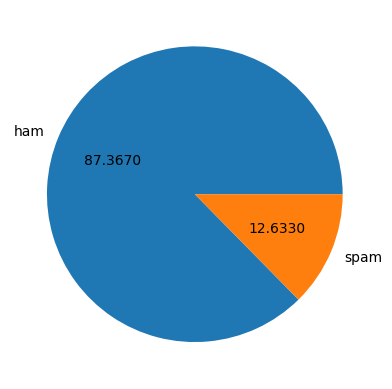

In [20]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [22]:
# df is imbalanced

In [22]:
# Download the stopwords dfset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Split the dfset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform on the training df
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test df
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training df
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test df
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.971953578336557
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

